In [28]:
"""
Code for calculating the mAP of any Object Detection Model--------------

Steps:

    1. created manually the ground-truth boxes in the following manner ([x, y, width, height, class-label])
    2. created manually the predicted boxes in the following manner ([x, y, width, height, confidence score])
    3. sorted predicted boxes in descending order based on confidence score
    4. computed the Intersection over Union (IoU) to check the overlapping between a predicted box and any ground-truth box
    5. computed the confusion matrix for calculating Average Precision (true positive, false positive)
    6. computed the Average Precision for calculating the mAP
    7. computed the Mean Average Precision (mAP)
    8. visualized some plots for better understanding


    References: 

    1. https://shubhamchauhan125.medium.com/map-mean-average-precision-for-object-detection-with-simple-python-demonstration-dcc7b3850a07
    2. https://pyimagesearch.com/2022/05/02/mean-average-precision-map-using-the-coco-evaluator/
"""

'\nCode for calculating the mAP of any Object Detection Model--------------\n\nSteps:\n\n    1. created manually the ground-truth boxes in the following manner ([x, y, width, height, class-label])\n    2. created manually the predicted boxes in the following manner ([x, y, width, height, confidence score])\n    3. sorted predicted boxes in descending order based on confidence score\n    4. computed the Intersection over Union (IoU) to check the overlapping between a predicted box and any ground-truth box\n    5. computed the confusion matrix for calculating Average Precision (true positive, false positive)\n    6. computed the Average Precision for calculating the mAP\n    7. computed the Mean Average Precision (mAP)\n    8. visualized some plots for better understanding\n\n\n    References: \n\n    1. https://shubhamchauhan125.medium.com/map-mean-average-precision-for-object-detection-with-simple-python-demonstration-dcc7b3850a07\n    2. \n'

In [29]:
# importing numpy for matrices operation
import numpy as np

In [30]:
# defining the ground truth (demo class number at the last index) and predicted boxes (confidence scores at the last index)
gt_boxes = np.array([
                     [10, 10, 50, 50, 0], 
                     [60, 60, 100, 100, 0], 
                     [120, 120, 160, 160, 0], 
                     [200, 200, 240, 240, 0], 
                     [300, 300, 340, 340, 0]
                     ])

pred_boxes = np.array([
                     [8, 8, 48, 48, 0.8], 
                     [10, 10, 50, 50, 0.9], 
                     [60, 60, 100, 100, 0.7], 
                     [120, 120, 160, 160, 0.6], 
                     [200, 200, 240, 240, 0.5]
                     ])

# sorting (descending) the predicted boxes by confidence scores
pred_boxes = pred_boxes[pred_boxes[:, 4].argsort()[::-1]]
pred_boxes

array([[ 10. ,  10. ,  50. ,  50. ,   0.9],
       [  8. ,   8. ,  48. ,  48. ,   0.8],
       [ 60. ,  60. , 100. , 100. ,   0.7],
       [120. , 120. , 160. , 160. ,   0.6],
       [200. , 200. , 240. , 240. ,   0.5]])

In [31]:
# computing the intersection over union (IoU) between two bounding boxes
def compute_iou(box1, box2):
    """Ensuring successful parameters passing"""
    print("box1 before unpacking: ", box1)
    print("box2 before unpacking: ", box2)

    x1, y1, w1, h1 = box1                             # unpacking as x coordinate, y coordinate, width, height of predicted box
    print("x coordinate of predicted box: ", x1)
    print("y coordinate of predicted box: ", y1)
    print("width of predicted box: ", w1)
    print("height of predicted box: ", h1)

    x2, y2, w2, h2 = box2                             # unpacking as x coordinate, y coordinate, width, height of ground-truth box
    print("x coordinate of ground-truth box: ", x2)
    print("y coordinate of ground-truth box: ", y2)
    print("width of ground-truth box: ", w2)
    print("height of ground-truth box: ", h2)

    xi1 = max(x1, x2)                                 # computes the leftmost x-coordinate of the intersection of the two boxes

    yi1 = max(y1, y2)                                 # computes the topmost y-coordinate of the intersection of the two boxes

    xi2 = min(x1 + w1, x2 + w2)                       # computes the rightmost x-coordinate of the intersection of the two boxes

    yi2 = min(y1 + h1, y2 + h2)                       # computes the bottommost y-coordinate of the intersection of the two boxes

    if xi2 <= xi1 or yi2 <= yi1:                      # checking if the two boxes are not overlapping
        print("No overlapped!")
        return 0.0
    else:                                             
        print("Overlapped!")
        inter_area = (xi2 - xi1) * (yi2 - yi1)        # computing the area of the intersection between the two boxes
        box1_area = w1 * h1                           # computing the area of the predicted box
        box2_area = w2 * h2                           # computing the area of the ground-truth box
        iou = inter_area / (box1_area + box2_area - inter_area)     # computing the IoU
        return iou

In [32]:
# Calculate the number of true positives (tp) and false positives (fp) at each point
tp = np.zeros(len(pred_boxes))
fp = np.zeros(len(pred_boxes))
for i in range(len(pred_boxes)):
    iou_max = -np.inf
    for j in range(len(gt_boxes)):
        iou = compute_iou(pred_boxes[i, :4], gt_boxes[j, :4])
        if iou > iou_max:
            iou_max = iou
            j_max = j
    if iou_max >= 0.5:
        if not gt_boxes[j_max, 4]:
            tp[i] = 1.
            gt_boxes[j_max, 4] = 1.   # tracking the already matched ground-truth box
        else:
            fp[i] = 1.
    else:
        fp[i] = 1.

box1 before unpacking:  [10. 10. 50. 50.]
box2 before unpacking:  [10 10 50 50]
x coordinate of predicted box:  10.0
y coordinate of predicted box:  10.0
width of predicted box:  50.0
height of predicted box:  50.0
x coordinate of ground-truth box:  10
y coordinate of ground-truth box:  10
width of ground-truth box:  50
height of ground-truth box:  50
Overlapped!
box1 before unpacking:  [10. 10. 50. 50.]
box2 before unpacking:  [ 60  60 100 100]
x coordinate of predicted box:  10.0
y coordinate of predicted box:  10.0
width of predicted box:  50.0
height of predicted box:  50.0
x coordinate of ground-truth box:  60
y coordinate of ground-truth box:  60
width of ground-truth box:  100
height of ground-truth box:  100
No overlapped!
box1 before unpacking:  [10. 10. 50. 50.]
box2 before unpacking:  [120 120 160 160]
x coordinate of predicted box:  10.0
y coordinate of predicted box:  10.0
width of predicted box:  50.0
height of predicted box:  50.0
x coordinate of ground-truth box:  120
y

In [33]:
# Calculate precision and recall at each point
tp_cumsum = np.cumsum(tp)
print("Cumulative sum of true-positive: ", tp_cumsum)
fp_cumsum = np.cumsum(fp)
print("Cumulative sum of false-positive: ", fp_cumsum)
recall = tp_cumsum / len(gt_boxes)                     # representing the fraction of relevant ground-truth boxes that are successfully retrieved by the algorithm
print("Recall value: ", recall)
precision = tp_cumsum / (tp_cumsum + fp_cumsum)        # representing the fraction of predicted boxes that are actually relevant
print("Precision value: ", precision)

Cumulative sum of true-positive:  [1. 1. 2. 3. 4.]
Cumulative sum of false-positive:  [0. 1. 1. 1. 1.]
Recall value:  [0.2 0.2 0.4 0.6 0.8]
Precision value:  [1.         0.5        0.66666667 0.75       0.8       ]


In [34]:
# Compute average precision (AP)
ap = 0
for t in np.arange(0., 1.1, 0.1):
    print("Current value in t: ", t)
    if np.sum(recall >= t) == 0:
        p = 0
    else:
        p = np.max(precision[recall >= t])      # calculating the maximum precision value for each threshold for all points in the precision array where the recall is greater than or equal to the threshold
        print("Current value in p: ", p)
    ap += p / 11.0
    print("Current value in ap: ", ap)
print("Average Precision: ", ap)

Current value in t:  0.0
Current value in p:  1.0
Current value in ap:  0.09090909090909091
Current value in t:  0.1
Current value in p:  1.0
Current value in ap:  0.18181818181818182
Current value in t:  0.2
Current value in p:  1.0
Current value in ap:  0.2727272727272727
Current value in t:  0.30000000000000004
Current value in p:  0.8
Current value in ap:  0.34545454545454546
Current value in t:  0.4
Current value in p:  0.8
Current value in ap:  0.4181818181818182
Current value in t:  0.5
Current value in p:  0.8
Current value in ap:  0.49090909090909096
Current value in t:  0.6000000000000001
Current value in p:  0.8
Current value in ap:  0.5636363636363637
Current value in t:  0.7000000000000001
Current value in p:  0.8
Current value in ap:  0.6363636363636365
Current value in t:  0.8
Current value in p:  0.8
Current value in ap:  0.7090909090909092
Current value in t:  0.9
Current value in ap:  0.7090909090909092
Current value in t:  1.0
Current value in ap:  0.7090909090909092

In [35]:
# Compute mean average precision (mAP)
mAP = np.mean(ap)
print("mAP:", mAP)                    # mAP should be the same as ap for being only one class here

mAP: 0.7090909090909092


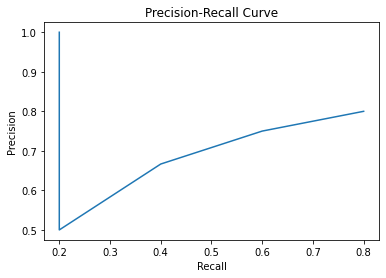

In [36]:
import matplotlib.pyplot as plt

# Plot precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

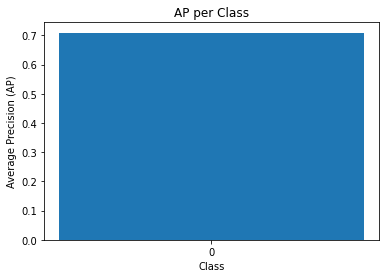

In [37]:
# Plot average precision (AP) for each class (only 1 class is here for simplicity purpose)
plt.bar(np.arange(1), ap)
plt.xlabel('Class')
plt.ylabel('Average Precision (AP)')
plt.title('AP per Class')
plt.xticks(np.arange(1))
plt.show()

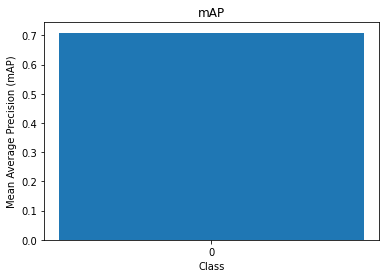

In [38]:
# Plot mean average precision (mAP)
plt.bar(np.arange(1), mAP)
plt.xlabel('Class')
plt.ylabel('Mean Average Precision (mAP)')
plt.title('mAP')
plt.xticks(np.arange(1))
plt.show()